# DONNEES DE PANEL

Application : prix du billet d'avion et concentration du marché du transport aérien.

Nous nous plaçons à la fin des années 1990. Il y a encore peu de compagnies d'aviation concurrentes à cette époque. Les autorités de la concurrence souhaitent savoir si le fait d'introduire de la concurrence permettrait de baisser les tarifs pratiqués par les compagnies aériennes. 

Nous disposons des données de 1149 trajets de vol interne aux États-Unis pour les quatre années suivantes : 1997, 1998, 1999, 2000 : 

$id$ : Identifiant du trajet de vol

$annee$ : Année

$tarif$ : Prix moyen du billet aller en dollars

$concen$ : Part de la compagnie la plus importante sur le marché (entre 0 et 1)

$dist$ : Distance du trajet de vol en km

Nous souhaitons savoir si la concentration d'un trajet particulier dans les mains d'une compagnie a une influence sur le prix qu'elle pratique. 

## 1. Structure de l'échantillon

Ouvrir les données **TD8_airfaremodified_v12.dta**.

In [2]:
library(foreign)
ds<-read.dta("TD8_airfaremodified_v12.dta")

Combien a-t-on d'observations au total ?

In [3]:
dim(ds)

[1] 4596    7

Quelle est l'unité individuelle, quelle est l'unité temporelle du panel ? 

unité individuelle : iD , temporelle : l'année 

A quoi ressemble donc la matrice des données de panel ? Utliser head().

In [4]:
head(ds)

,origin,destin,id,dist,concen,tarif,annee
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,"AKRON, OH","ATLANTA, GA",1,844.8,0.8386,106,1997
2,"AKRON, OH","ATLANTA, GA",1,844.8,0.8133,106,1998
3,"AKRON, OH","ATLANTA, GA",1,844.8,0.8262,113,1999
4,"AKRON, OH","ATLANTA, GA",1,844.8,0.8612,123,2000
5,"AKRON, OH","ORLANDO, FL",2,1377.6,0.5798,104,1997
6,"AKRON, OH","ORLANDO, FL",2,1377.6,0.5817,105,1998


Régresser le prix sur la concentration par MCO. Commenter. 

In [5]:
correlation<-lm(tarif~concen, data=ds)
summary(correlation)


Call:
lm(formula = tarif ~ concen, data = ds)

Residuals:
    Min      1Q  Median      3Q     Max 
-141.77  -55.61  -12.95   47.16  350.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  223.154      3.539   63.06   <2e-16 ***
concen       -72.704      5.521  -13.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73.51 on 4594 degrees of freedom
Multiple R-squared:  0.03637,	Adjusted R-squared:  0.03617 
F-statistic: 173.4 on 1 and 4594 DF,  p-value: < 2.2e-16


correlation négative .

En moyenne , Plus la concentration augmente  plus le prix diminue. 

Produire un graphique mettant en relation la variable de concentration du marché et le prix du vol, en utilisant l'option **+ facet_wrap(~...)** pour différencier les 4 années, sur le sous échantillon des observations dont la distance de vol est inférieure ou égale à 2000 miles. 

Faire le même graphique sur le sous-échantillon des observations dont la distance de vol est supérieure à 2000 miles. 

Commenter. 

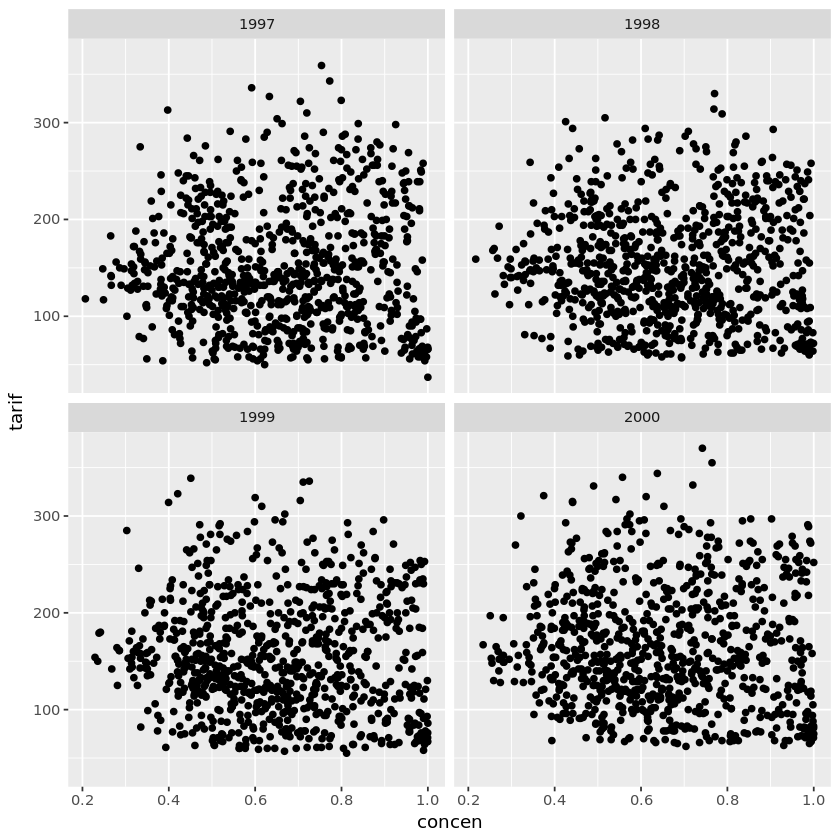

In [6]:
library(ggplot2)
ggplot(ds[ds$dist<=2000,], aes(x=concen, y=tarif)) + geom_point() + facet_wrap(~annee)

#relation négative, plus la concentration augmente plus le prix diminue

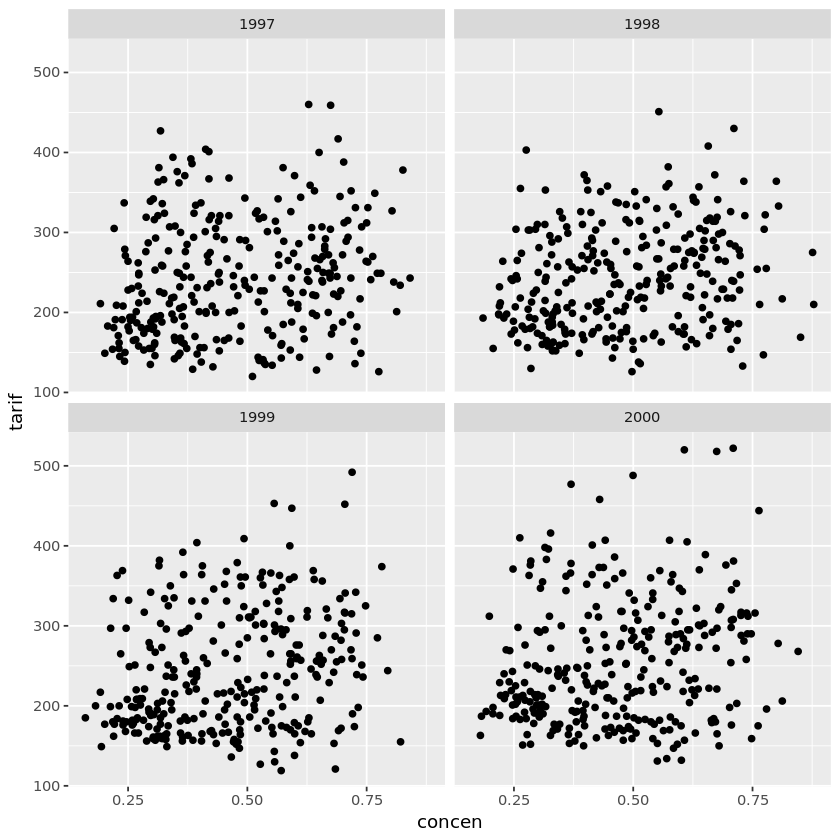

In [7]:
ggplot(ds[ds$dist>2000,], aes(x=concen,y=tarif))+geom_point()+facet_wrap(~annee)
#pour les vols longs, plus la concentration augmente, plus les prix augmentent

## 2. Analyse

### 2.1 MCO groupés (pooled OLS)
On souhaite estimer l'effet de la concentration sur le prix, en tenant compte de la distance du vol. 
Quelle est la variable dépendante ? La variable explicative principale ? Quel est le signe attendu du paramètre des différentes variables ? Ecrire l'équation à estimer. 

In [8]:
simple<-lm(tarif~concen+dist, data=ds)
summary(simple)


Call:
lm(formula = tarif ~ concen + dist, data = ds)

Residuals:
    Min      1Q  Median      3Q     Max 
-146.26  -44.08  -11.86   39.11  215.89 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.189416   4.255234   10.86   <2e-16 ***
concen      73.357392   5.064736   14.48   <2e-16 ***
dist         0.055476   0.001016   54.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.26 on 4593 degrees of freedom
Multiple R-squared:  0.4155,	Adjusted R-squared:  0.4153 
F-statistic:  1633 on 2 and 4593 DF,  p-value: < 2.2e-16


Estimer ce modèle par MCO. Toutes choses égales par ailleurs, quel est l'effet d'une distance de 100km supplémentaire ? D'une concentration de 10 points plus élevée ?

On trouve une relation positive : entre concentration et le prix : plus la concentration est ellevé : plus le prix est eleve. 

Ici , une augmentation d'une unité de concentration engendre une augmentation de 73$ du prix du billet. 

une unite de concentration: de 0 a 1 est de 0% a 100%

si on veut l'effet de 10 point, Ici , une augmentation de 10 points de concentration engendre une augmentation de 7,3$ du prix du billet. 

chaque miles ajoute au prix du billet 0,055$. chaque 100 miles ajoute au prix du billet 5,55$

Un économétricien transformera toujours les données de prix et ici de distance en log. Donner les différentes raisons de ce choix. 

Pour plusieurs raisons : 
- comprendre l'ordre de grandeur des variations : comprendre ce que l'on a dit précédemment. Comprendre l'impact des fluctuations, on se rapporte à la moyenne de ces variables.
- raisonner en élasticité constante : en raisonnant en niveau : on considère que l'effet sera le même sur le prix : en ajoutant un point de concentration en partant de 50% ou de 99% de concentration : pas réaliste si non-liberté : passé en log ça nous permet d'avoir des élasticités constantes qui n'est pas linéaire
- Nous rapproche : du cas : ou l'erreur va suivre une loi normale : conditionnel aux l'explicatives x : ce qui va reste ne non expliqué est plus proche de suivre une loi normale : contaminer au niveau.

On ajoute donc au dataframe *ds* les données *ldist* et *ltarif* qui seront les données en logarithme de *dist* et *tarif*.

In [9]:
ds$ldist<-log(ds$dist)
ds$ltarif<-log(ds$tarif)

On estime ensuite le même modèle que précédemment, mais cette fois-ci avec les variables *ldist* et *lconcen*. Interpréter les coefficients.

In [10]:
pooled<-lm(ltarif~concen+ldist, data=ds)
summary(pooled)


Call:
lm(formula = ltarif ~ concen + ldist, data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35809 -0.25985 -0.03736  0.25628  1.16083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.657873   0.076496   21.67   <2e-16 ***
concen      0.316637   0.030370   10.43   <2e-16 ***
ldist       0.452738   0.009048   50.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3425 on 4593 degrees of freedom
Multiple R-squared:  0.3845,	Adjusted R-squared:  0.3842 
F-statistic:  1434 on 2 and 4593 DF,  p-value: < 2.2e-16


Modèle log-log : tarif - disante : quand x varie de 1% y varie de beta% : donc : donc quand : la distnace varaire de 1% le prix varie de 0,4*

modele concen : log-niveau : quand x varie de 1 y varie de beta*100 : quand concen augmente  de 1 le prix augemnte de 31%

quand concen augmente  de 10 point  le prix augemnte de 3,1%




Question subsidiaire : comment interpréter le coefficient d'un modèle niveau-log ?

quand x varie de 1 % y varie de beta sur 100 unité 

On ajoute des effets fixes temporels. Rappeler la définition. Ecrire l'équation à estimer. 

<font color=green> 
Définition : $\eta_{t}$ = effets fixes temporels (autant de variables indicatrices binaires que de périodes, -1 pour éviter la colinéarité) qui captent la tendance temporelle générale de l'évolution de $tarif$ (évolution commune à tous les vols).

Equation : $log(tarif_{it}) = \gamma concen_{it} + \beta_{1} log(dist_{i})  + \eta_{t} + \epsilon_{it}$. 
</font>

On estime le modèle par MCO en ajoutant à notre fonction **lm()** précédente la variable "factor(*annee*)". 

a) Pourquoi pas la variable *annee* directement ? 

In [11]:
pooled_tfe<-lm(ltarif~concen+ldist+factor(annee), data=ds)
summary(pooled_tfe)


Call:
lm(formula = ltarif ~ concen + ldist + factor(annee), data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32066 -0.25931 -0.03519  0.25559  1.10283 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.605579   0.076658  20.945  < 2e-16 ***
concen            0.323896   0.030234  10.713  < 2e-16 ***
ldist             0.453888   0.009001  50.427  < 2e-16 ***
factor(annee)1998 0.021448   0.014211   1.509  0.13130    
factor(annee)1999 0.037572   0.014210   2.644  0.00822 ** 
factor(annee)2000 0.099473   0.014212   6.999 2.95e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3406 on 4590 degrees of freedom
Multiple R-squared:  0.3917,	Adjusted R-squared:  0.391 
F-statistic:   591 on 5 and 4590 DF,  p-value: < 2.2e-16


si j'avais mis directement la variable année : pas d'effet fixe temporel : mais un trend 
On aurait considéré la variable année de manière quantittative : la on a ajouté 4 variable binaire -1. 

b) Estimer.

Je vois que parmis les effets fixe temporal : 2 significatif : 1 non significatfif : entre 1997 et 1998 les prix n'augmentent pas mais 1997 1999 ont augmente  de 3.7% entre 1997 2000 ils augmentent de près de 10%

modèle log-niveau

c) Interpréter les effets fixes temporels. 

Quels sont les deux problèmes posés par cette méthode d'estimation ? 

#attention on a de l'autocorrélation des erreurs que l'on a pas prise en compte : les termes d'erreur ne sont pas independant : puisque au niveau intra-individuel : erreur correlle : l'erreur contient un composant inobsevable fixe dans le temps : qui cree une crelation entre les observation d'une meme serie temporelle 

#estimateur qui peut être biaisé : on peut penser fort et faible. La régresison mco dit qu'un fort niveau de concentration est associé à un fort niveau de prix. 
La variable qui peut explique : fort nivau de concentration et niveau de prix : peut etre : proximité de la ligne : avec un centre economique : NY-LA et Stl-Alk. 
Plus procche de centre economqiue : plus la concurence sera rude : concentration faible : plus la proximite est grande : plus les couts seron faibe : prix des billets plus faibles. 
Inobservable : peut explique : effet apparant entre concentration et prix : elleve 


### 2.2 Modèles avec effets fixes individuels

Pour éviter ces deux problèmes potentiels, nous profitons de la structure de panel des données et nous estimons le modèle de régression avec effets fixes grâce à l'estimateur within. 

*Indice: on a besoin du package **plm** et de la fonction **plm(y~x, data=..., index=c("id","time", model="within")**.*

La on va pouvoir controllé pour des caractéristique inobservable fixe comme la présence de grand centre eonomique. 

In [12]:
install.packages("plm")
library(plm)
fixed<-plm(ltarif~concen+ldist+factor(annee), data=ds, index=c("id","annee"), model="within")
summary(fixed)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message:
“'default.stringsAsFactors' is deprecated.
Use '`stringsAsFactors = FALSE`' instead.
See help("Deprecated")”


Oneway (individual) effect Within Model

Call:
plm(formula = ltarif ~ concen + ldist + factor(annee), data = ds, 
    model = "within", index = c("id", "annee"))

Balanced Panel: n = 1149, T = 4, N = 4596

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8812810 -0.0397341  0.0023906  0.0436350  0.9188103 

Coefficients:
                   Estimate Std. Error t-value  Pr(>|t|)    
concen            0.1688590  0.0294101  5.7415 1.020e-08 ***
factor(annee)1998 0.0228328  0.0044515  5.1292 3.071e-07 ***
factor(annee)1999 0.0363819  0.0044495  8.1766 4.061e-16 ***
factor(annee)2000 0.0977716  0.0044555 21.9441 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    45.169
Residual Sum of Squares: 39.06
R-Squared:      0.13524
Adj. R-Squared: -0.1541
F-statistic: 134.611 on 4 and 3443 DF, p-value: < 2.22e-16

A quoi sert la commande index=c("id", "time") ? Que signifie ``model="within"'' ?

In [ ]:
Index nous dit la strucutre de panel 

le modèle within : modèle a effet fixe individuel 

Quel est l'avantage de cette méthode d'estimation ?

elle se base sur une variation intra-individuelle :
elle se base sur variation intraindividuel, on mesure l'efet moyent de la variation de la concentration sur le prix a l'aide de la variation au seins de chaque ligne aérienne dans le teps , une ligen est donc son prorpep contrefactuel : avantage auorise la corelation en tre effet fixe inicuelle et variable de traitement. 

Inobservable : si stable dans le temps : ne vont pas bisaier coefficent estime : centre eco : na va pas biasier : car stable dans le temps

Pourquoi ne peut-on pas utiliser la variable $dist$ ?

N'apparait pas : car fixe dans le temps : disparrait dans le processus d'estimation. 

Processus : moyenne intra-individuel des varaibles : ecart a la moyenne intra-indviduelle  et on regresse l'ecart a la moyenne intra-individuel y sur l'ecarrt a la moyenne intra-individuel des x 

Si on fait ca sur la variable  distance toujorus egal a 0 car ne chaneg pas dans le temps : pas de varaition de l'ecarrt a la moyenne intra-individuel

Interpréter le paramètre de $concen$.

A peut pres divise par 2. 

Quand la concentration augmente de 100 point le prix augmente de 16%
Quand la concentration augmente de 10 point le prix augmente de 1,6%

On souhaite vérifier que l'estimateur within donne bien le même coefficient que l'**estimateur MCO qui inclut des effets fixes individuels et temporels**. Pour cela on estime par MCO le même modèle avec effets fixes temporels et individuels. 

Estimer et commenter.

In [13]:
pooled_tfe_ife<-lm(ltarif~concen+ldist+factor(annee)+factor(id), data=ds)
summary(pooled_tfe_ife)
#autant de constante que de trajet de vol, on voit que le coef est identique à tte à l'heure


Call:
lm(formula = ltarif ~ concen + ldist + factor(annee) + factor(id), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88128 -0.03973  0.00239  0.04363  0.91881 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.7467405  1.0876121   0.687 0.492389    
concen             0.1688590  0.0294101   5.742 1.02e-08 ***
ldist              0.5623389  0.1555634   3.615 0.000305 ***
factor(annee)1998  0.0228328  0.0044515   5.129 3.07e-07 ***
factor(annee)1999  0.0363819  0.0044495   8.177 4.06e-16 ***
factor(annee)2000  0.0977716  0.0044555  21.944  < 2e-16 ***
factor(id)2       -0.2275199  0.0758138  -3.001 0.002710 ** 
factor(id)3        0.4005965  0.0748676   5.351 9.33e-08 ***
factor(id)4        0.5533816  0.0670399   8.255  < 2e-16 ***
factor(id)5       -0.3305055  0.0978139  -3.379 0.000736 ***
factor(id)6        0.7702682  0.1335199   5.769 8.68e-09 ***
factor(id)7       

De même, on souhaite vérifier que la transformation des données par soustraction de la moyenne individuelle donne bien le même coefficient. Grâce au code ci-dessous on crée la transformation de ltarif : 

In [14]:
ds$mean_ltarif<-ave(ds$ltarif,ds$id)#Moyenne intra-individuel
ds$demeaned_ltarif<-ds$ltarif-ds$mean_ltarif#ecart a la moyenne intra-individuel

a) Faire de même pour concen. 

b) Estimer par MCO la régression de *demeaned_ltarif* sur *demeaned_lconcen* et les effets fixes temporels *factor(annee)*. 

In [15]:
ds$mean_concen<-ave(ds$concen,ds$id)
ds$demeaned_concen<-ds$concen-ds$mean_concen

In [16]:
pooled_demean<-lm(demeaned_ltarif~demeaned_concen+factor(annee), data=ds)
summary(pooled_demean)


Call:
lm(formula = demeaned_ltarif ~ demeaned_concen + factor(annee), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88128 -0.03973  0.00239  0.04363  0.91881 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.039247   0.002722 -14.419  < 2e-16 ***
demeaned_concen    0.168859   0.025469   6.630 3.74e-11 ***
factor(annee)1998  0.022833   0.003855   5.923 3.39e-09 ***
factor(annee)1999  0.036382   0.003853   9.442  < 2e-16 ***
factor(annee)2000  0.097772   0.003858  25.340  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09224 on 4591 degrees of freedom
Multiple R-squared:  0.1352,	Adjusted R-squared:  0.1345 
F-statistic: 179.5 on 4 and 4591 DF,  p-value: < 2.2e-16


## 3. Choix de la méthode d'estimation

On sait qu'il existe un autre type d'estimateur pour les données de panel : les **effets aléatoires**. 

L'**avantage des effets aléatoires sur les MCO groupés** est que l'autocorrélation intraindividuelle des erreurs est modélisée donc prise en compte. 

Quel est l'avantage des effets aléatoires sur les effets fixes (within) ? L'inconvénient ?

avantage : par rapport a lestimateur a effet fixe : il est a variance minimal 
desavantage : comme les mco groupe : hypothèse que les effets fie individuel : sont non corrollé : aux explicative et indepednant : si corrole : biais e variable omise  

On estime le modèle avec effets aléatoires. Estimer et interpréter. 

*Indice: on utilise la même fonction **plm(y~x, data=..., index=c("id","time", model="...")**.*, mais avec le modèle **random** au lieu de **within**.

In [17]:
random<-plm(ltarif~concen+ldist+factor(annee), data=ds, index=c("id","annee"),model="random")
summary(random)

Warning message:
“'default.stringsAsFactors' is deprecated.
Use '`stringsAsFactors = FALSE`' instead.
See help("Deprecated")”


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = ltarif ~ concen + ldist + factor(annee), data = ds, 
    model = "random", index = c("id", "annee"))

Balanced Panel: n = 1149, T = 4, N = 4596

Effects:
                  var std.dev share
idiosyncratic 0.01134 0.10651 0.098
individual    0.10470 0.32357 0.902
theta: 0.8376

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8234303 -0.0627987 -0.0051945  0.0647800  0.8655053 

Coefficients:
                   Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)       1.8203271  0.1154451 15.7679 < 2.2e-16 ***
concen            0.2010512  0.0265472  7.5734 3.637e-14 ***
ldist             0.4344228  0.0152739 28.4421 < 2.2e-16 ***
factor(annee)1998 0.0225452  0.0044527  5.0632 4.122e-07 ***
factor(annee)1999 0.0366289  0.0044511  8.2292 < 2.2e-16 ***
factor(annee)2000 0.0981248  0.0044559 22.0211 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

In [ ]:
#En moyenne, quand la part de la plus grosse compagnie aérienne d'un trajet augmente de 10 points, le prix du billet augmente de 2%


Le chercheur veut faire un choix entre effets fixes et aléatoires. Quel estimateur va-t-il choisir ?

*Indice : il compare les deux modèles avec un test de Hausman :* **phtest(model1,model2)** 

In [18]:
phtest(fixed,random)


	Hausman Test

data:  ltarif ~ concen + ldist + factor(annee)
chisq = 6.469, df = 4, p-value = 0.1668
alternative hypothesis: one model is inconsistent


il choisit l'estimation avec les effets aléatoires. on fait un test d'Haussman. H0 est l'hypothèse selon laquelle les deux sont égaux et sans biais et l'effet aléatoires à variance minimale. 

La p-value indique que l'on ne peut pas rejeter H0 de similitude des paramètres estimés par effets fixes et effets aléatoires avec 
une chance de moins de 10% de se tromper. Comme la distance est statistiquement faible entre les deux ensembles de paramètres: c'est l'estimateur RE qui est 
préféré car l'estimateur FE n'est pas biaisé mais pas à variance minimale.
Si la distance pondérée était différente, alors on préfèrerait l'estimateur FE car il est le seul sans biais.